## SRM INSTITUTE OF SCIENCE AND TECHNOLOGY

### Advanced Machine Learning

Read the “data” dataset to perform the following

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### 1. Data Understanding (5 marks)

#### a. Read the dataset (tab, csv, xls, txt, inbuilt dataset). What do you understand from the dataset? (1 MARK)


In [2]:
data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [4]:
data.shape
data['dia'] = data[dia].astype['int']

(569, 32)

In [5]:
#The dataset appears to be related to cancer diagnosis where each column seems to provide information
#about the tumor where "diagnosis" seems the be target variable which indicates whether the tumor is
#malignant (M) or benign (B)

In [6]:
#Dropping the ID column as it doesnt provide any usefull information
data.drop('id', axis = 1, inplace = True)

#### b. Calculate five-point summary for numerical variables (1 MARK)

In [41]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.121315,3.518686,6.981000,11.710000,13.270000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


#### c. Summarize observations for categorical variables – no. of categories, % observations in each category. (1 mark)


In [8]:
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

Percentage of Benign Cases:  62.741652021089635 %
Percentage of Malignant Cases:  37.258347978910365 %


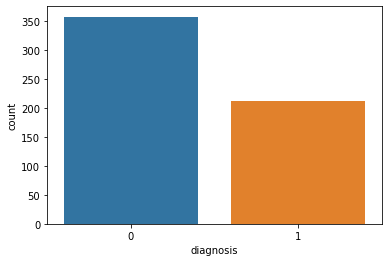

In [42]:
ax = sns.countplot(data['diagnosis'], label="Count")       # M = 212, B = 357
B, M = data['diagnosis'].value_counts()
print('Percentage of Benign Cases: ', (B/(B+M))*100,"%")
print('Percentage of Malignant Cases: ',(M/(B+M))*100,"%")

#### d. Check for defects in the data such as missing values, null, outliers, etc and also check for class imbalance. (2 marks)


In [10]:
data.isnull().sum()

diagnosis                   0
radius_mean                 7
texture_mean                0
perimeter_mean              0
area_mean                   0
smoothness_mean             0
compactness_mean            0
concavity_mean              0
concave points_mean         0
symmetry_mean               0
fractal_dimension_mean      0
radius_se                  11
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se                0
concave points_se           0
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst             0
concave points_worst        0
symmetry_worst              0
fractal_dimension_worst     0
dtype: int64

In [11]:
inp = data.drop(['diagnosis'], axis=1)
out = data['diagnosis']

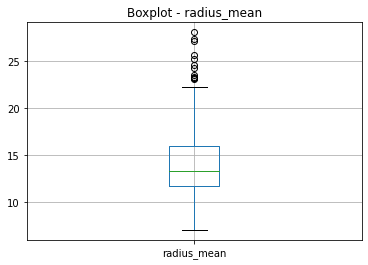

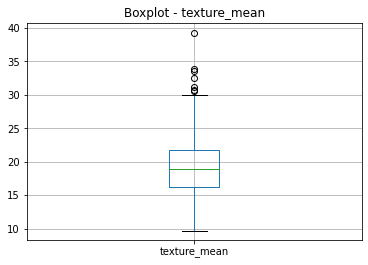

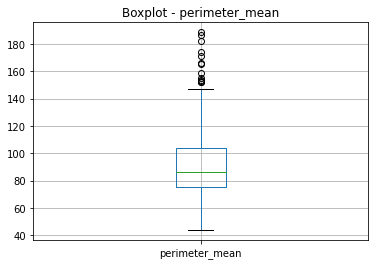

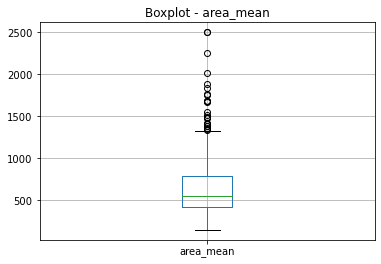

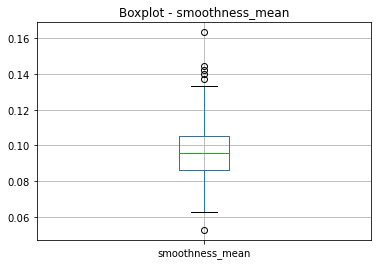

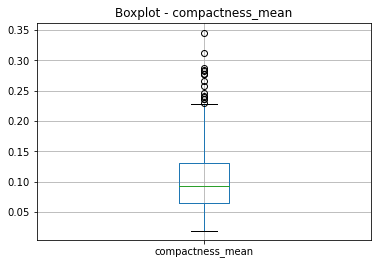

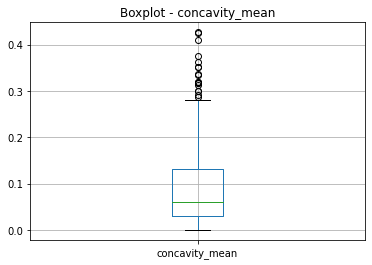

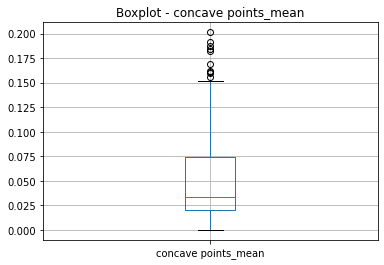

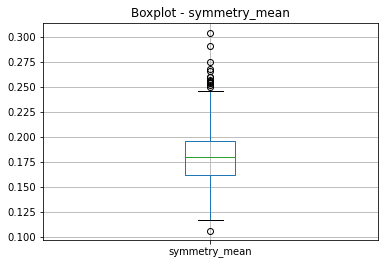

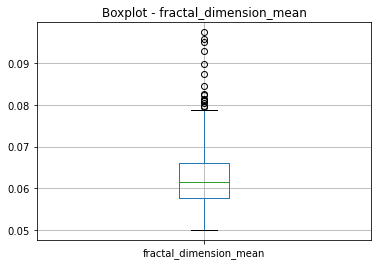

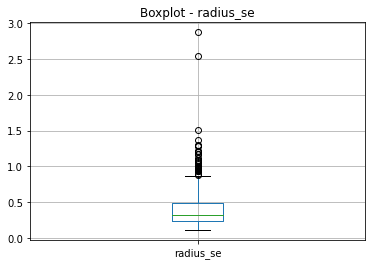

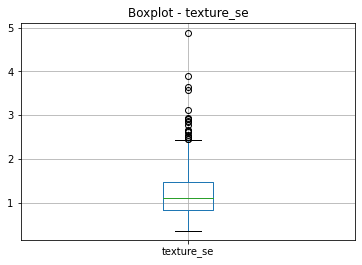

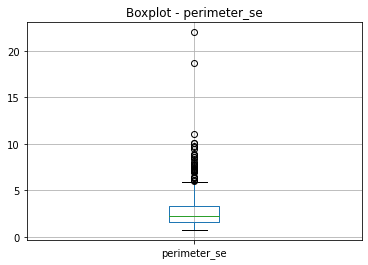

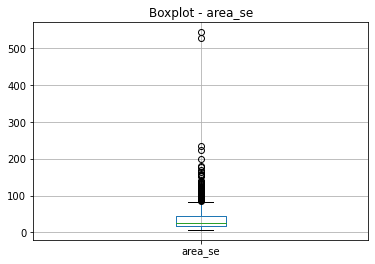

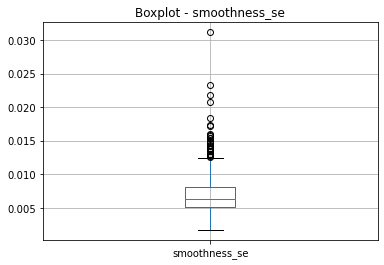

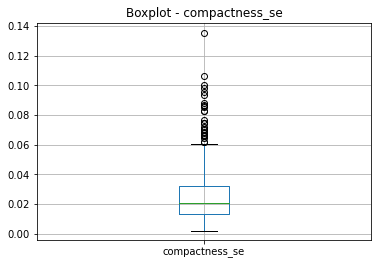

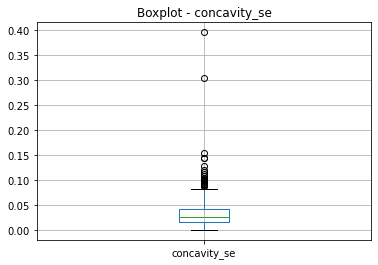

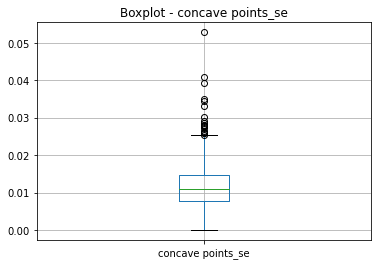

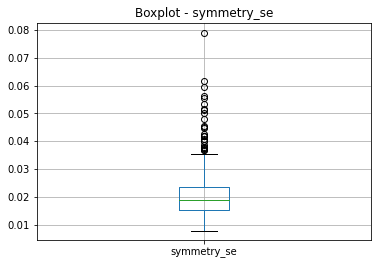

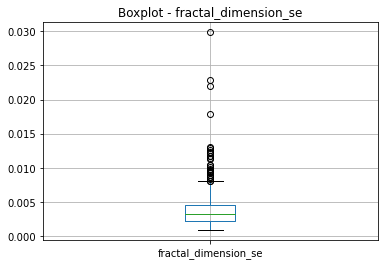

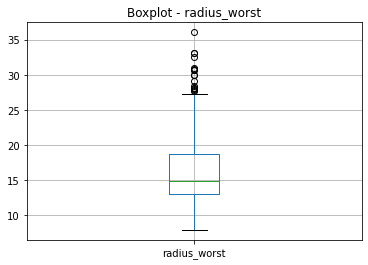

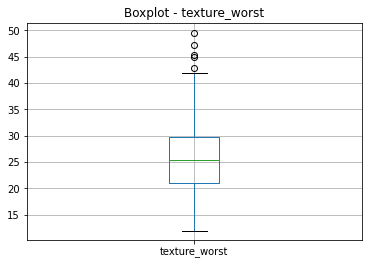

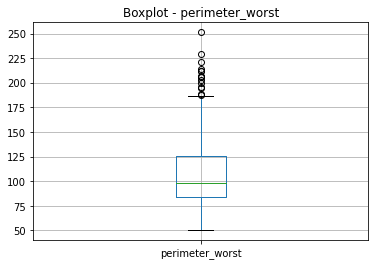

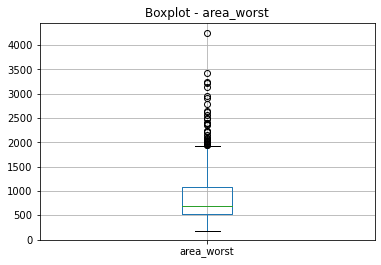

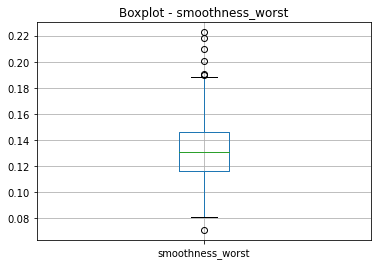

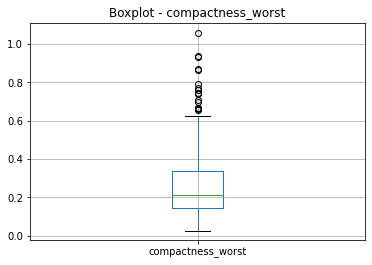

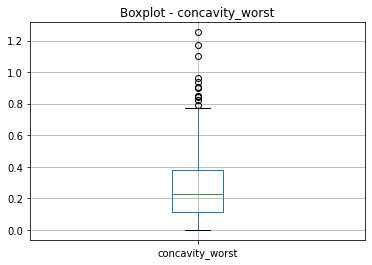

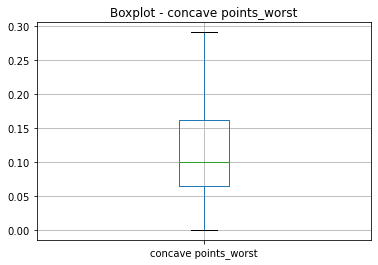

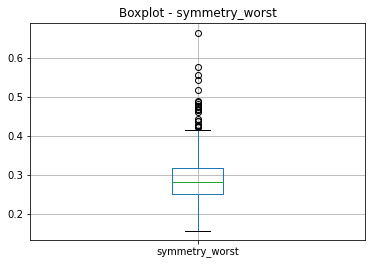

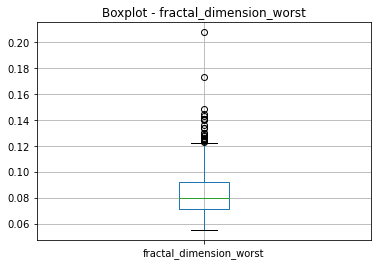

In [12]:
for column in inp.columns:
    plt.figure()
    data.boxplot(column=column)
    plt.title(f'Boxplot - {column}')
    plt.show()

###  2.  Data Preparation (15 marks)


#### a. Fix the defects if any and do appropriate treatment if any. (4 marks)

In [13]:
#We'll be replacing the missing valus in columns radius_se and radius_mean 
# with the mode of the respective columns.

radius_mean_mode = data['radius_mean'].mode()[0]
data['radius_mean'].fillna(radius_mean_mode, inplace=True)

radius_se_mode = data['radius_se'].mode()[0]
data['radius_se'].fillna(radius_se_mode, inplace=True)

In [14]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["diagnosis"] = encoder.fit_transform(data["diagnosis"] )

In [17]:
data.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730539,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730539,1.000000,0.323773,0.995490,0.986163,0.174318,0.504625,0.675209,0.821724,0.146615,...,0.967788,0.295843,0.963394,0.940613,0.121850,0.412076,0.525777,0.742609,0.162056,0.006880
texture_mean,0.415185,0.323773,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.995490,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.986163,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.174318,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.504625,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.675209,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.821724,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.146615,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


#### b. Visualize the data using relevant plots and explain the idea behind your choice of plot. Find out the variables which are highly correlated with Target? (4 marks)

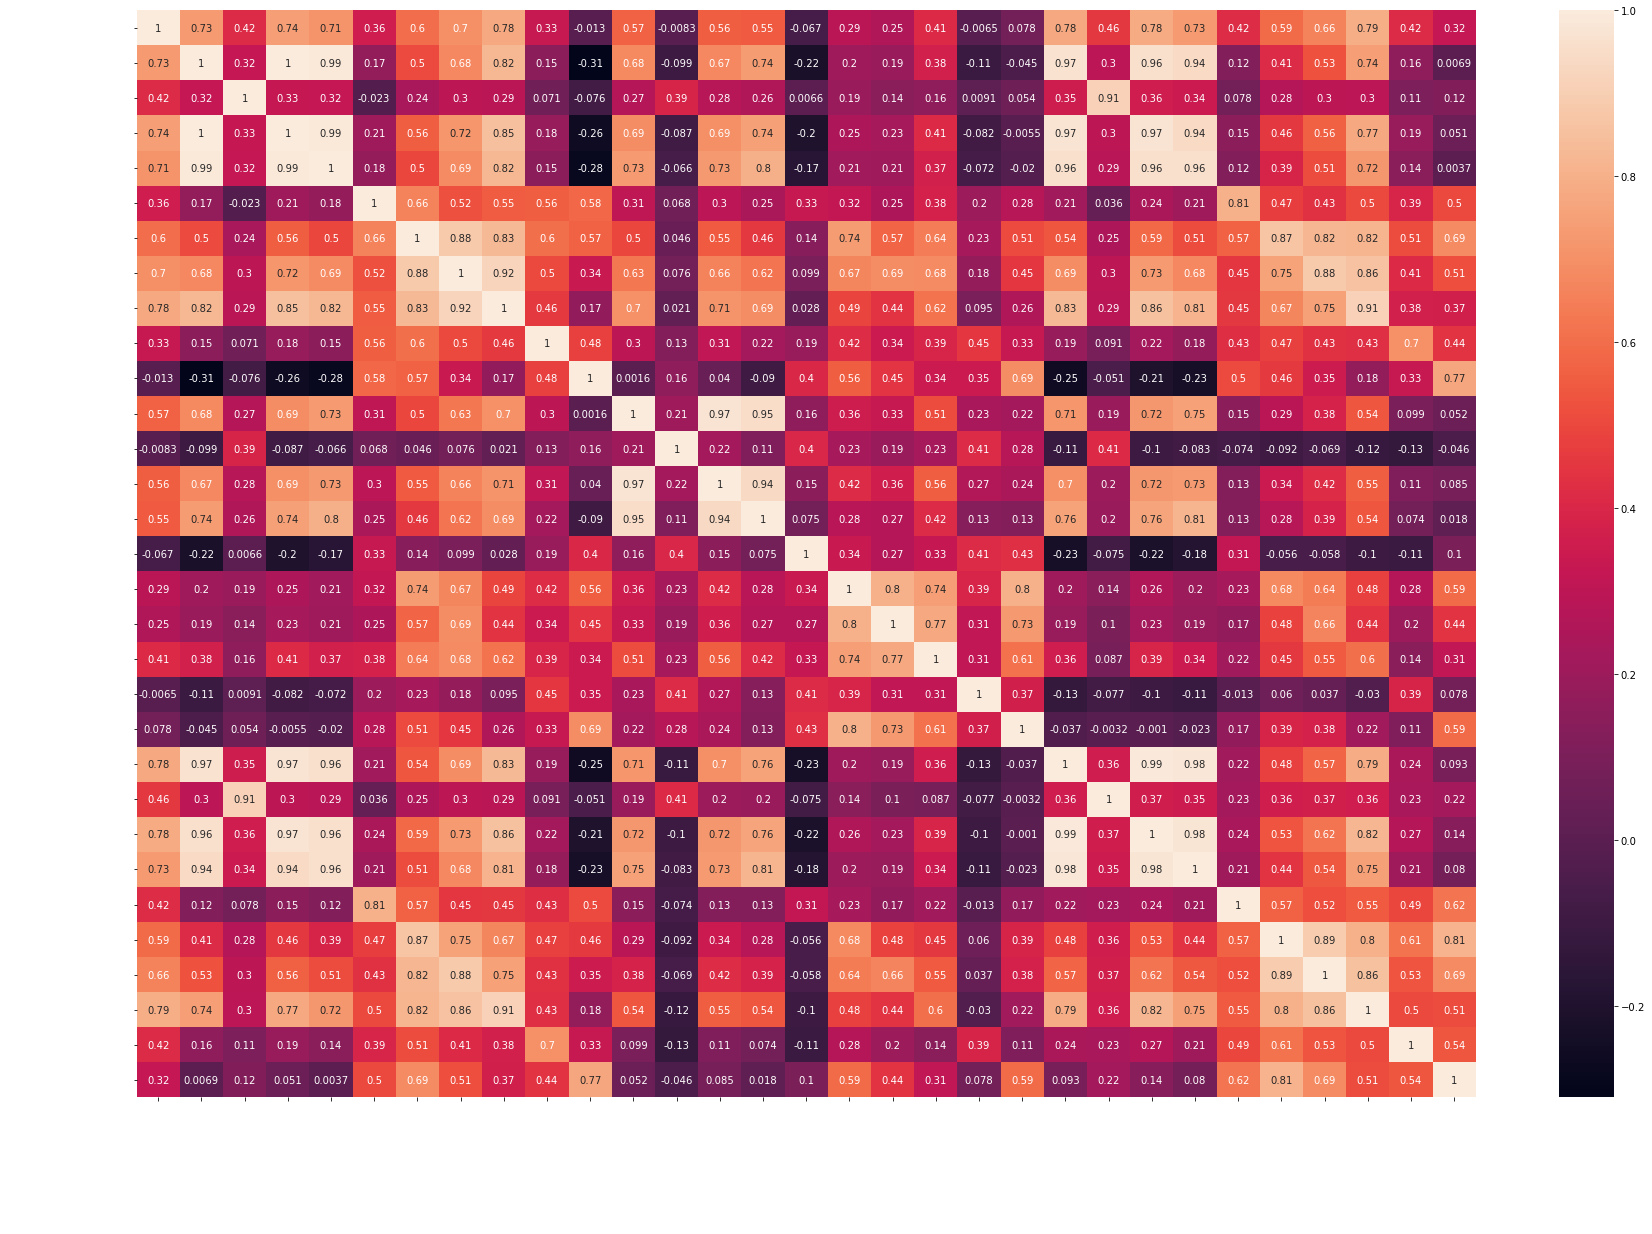

In [18]:
# Using a heatmap to visualize the correlation between the features

plt.figure(figsize =(30,20))
sns.heatmap(data.corr(), annot = True, annot_kws={"fontsize": 10})
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

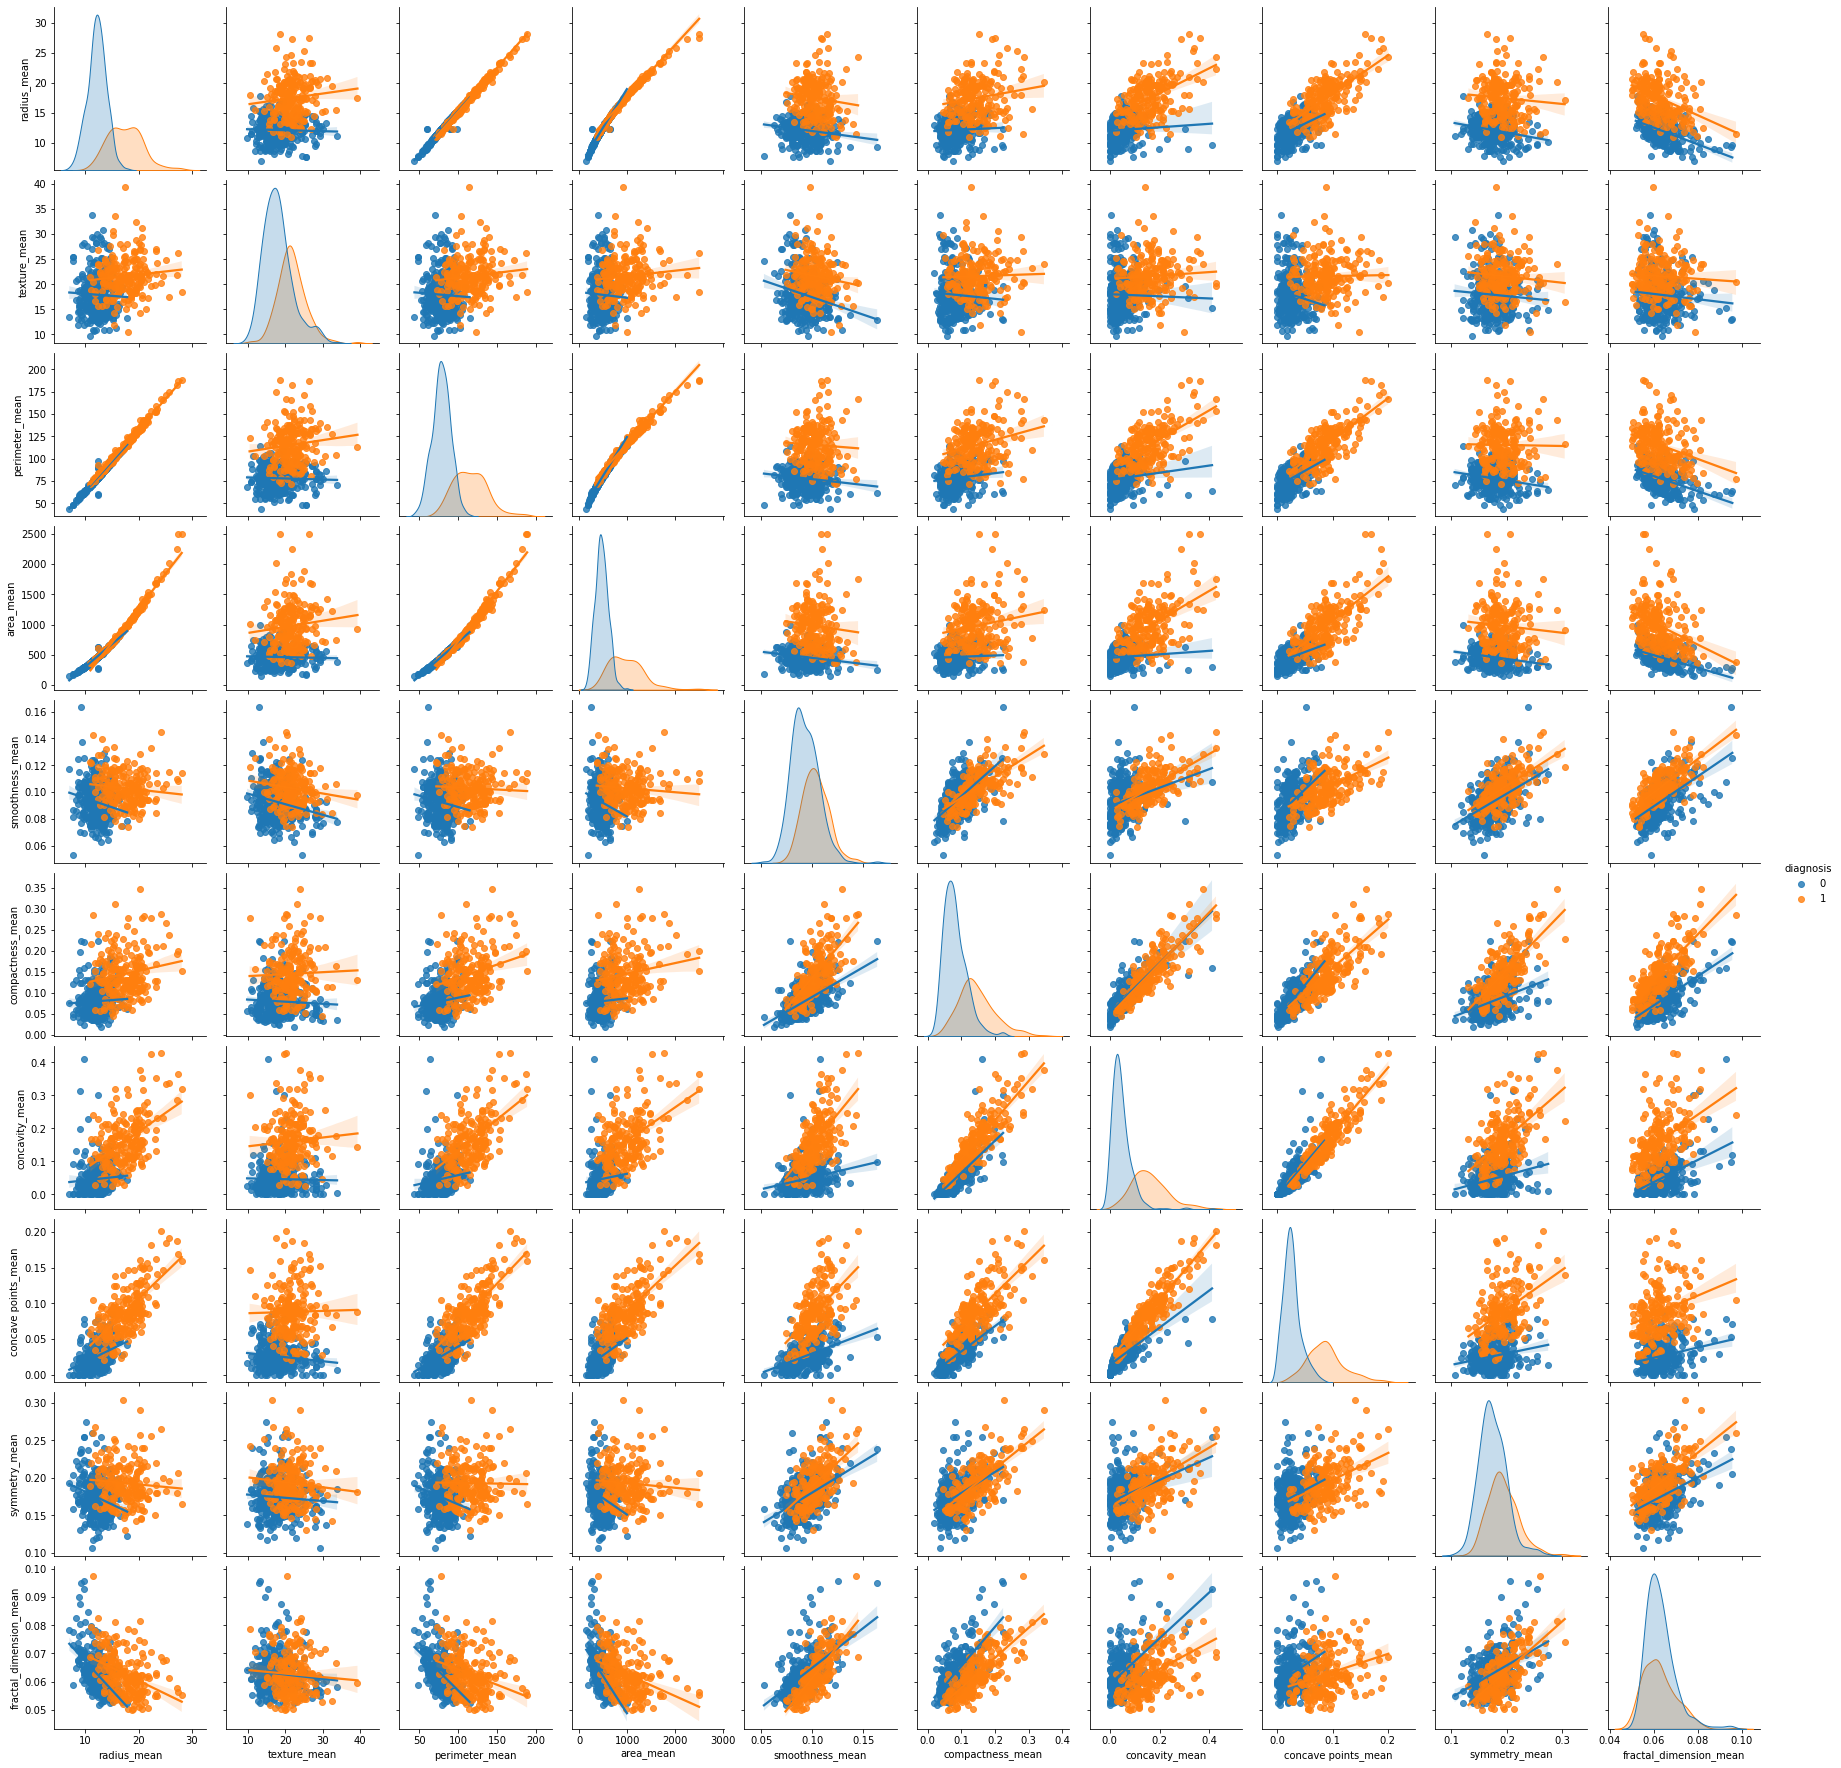

In [19]:
# Generating pairplots with the "mean" columns to visulaize the correlation between the features.

cols = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

sns.pairplot(data = data[cols], hue = 'diagnosis', kind = 'reg')

From the above two visuals it's evident of the presence of multicollinearity, such as between radius_mean, perimeter_mean and area_mean.

Multicollinearity refers to a high correlation or linear relationship between two or more predictor variables in a regression model. In other words, it occurs when there is a strong linear association between independent variables, which can lead to issues in the interpretation and performance of the regression model.

#### c. Do you want to exclude some variables from the model based on this analysis? What other actions will you take before moving ahead with model creation? Tell us the reason behind your choice of action.(4 marks)

-Here, the radius_mean column has a correlation of 1 and 0.99 with the perimeter_mean and area_mean column, resp. This is mainly because all the features gives infomration about the size of the observation(the cell). Therefore only one must be picked of the three
-Another place is between compactness, concavity and concave points.
-Also there's multicollinearity between the "mean" columns and "worst" columns. For eg, the radius column has a correlation of 0.97 with the radius_worst column, hence we'll be dropping all the "worst columns"

In [20]:
#Dropping all the columns causing multicolinearity.

cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst', 
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst',
        'perimeter_mean', 
        'area_mean', 
        'perimeter_se', 
        'area_se',
        'concavity_se',
        'concave points_se',
        'concavity_mean',
        'concave points_mean']
dataf = data.drop(cols, axis=1)

dataf.columns


Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

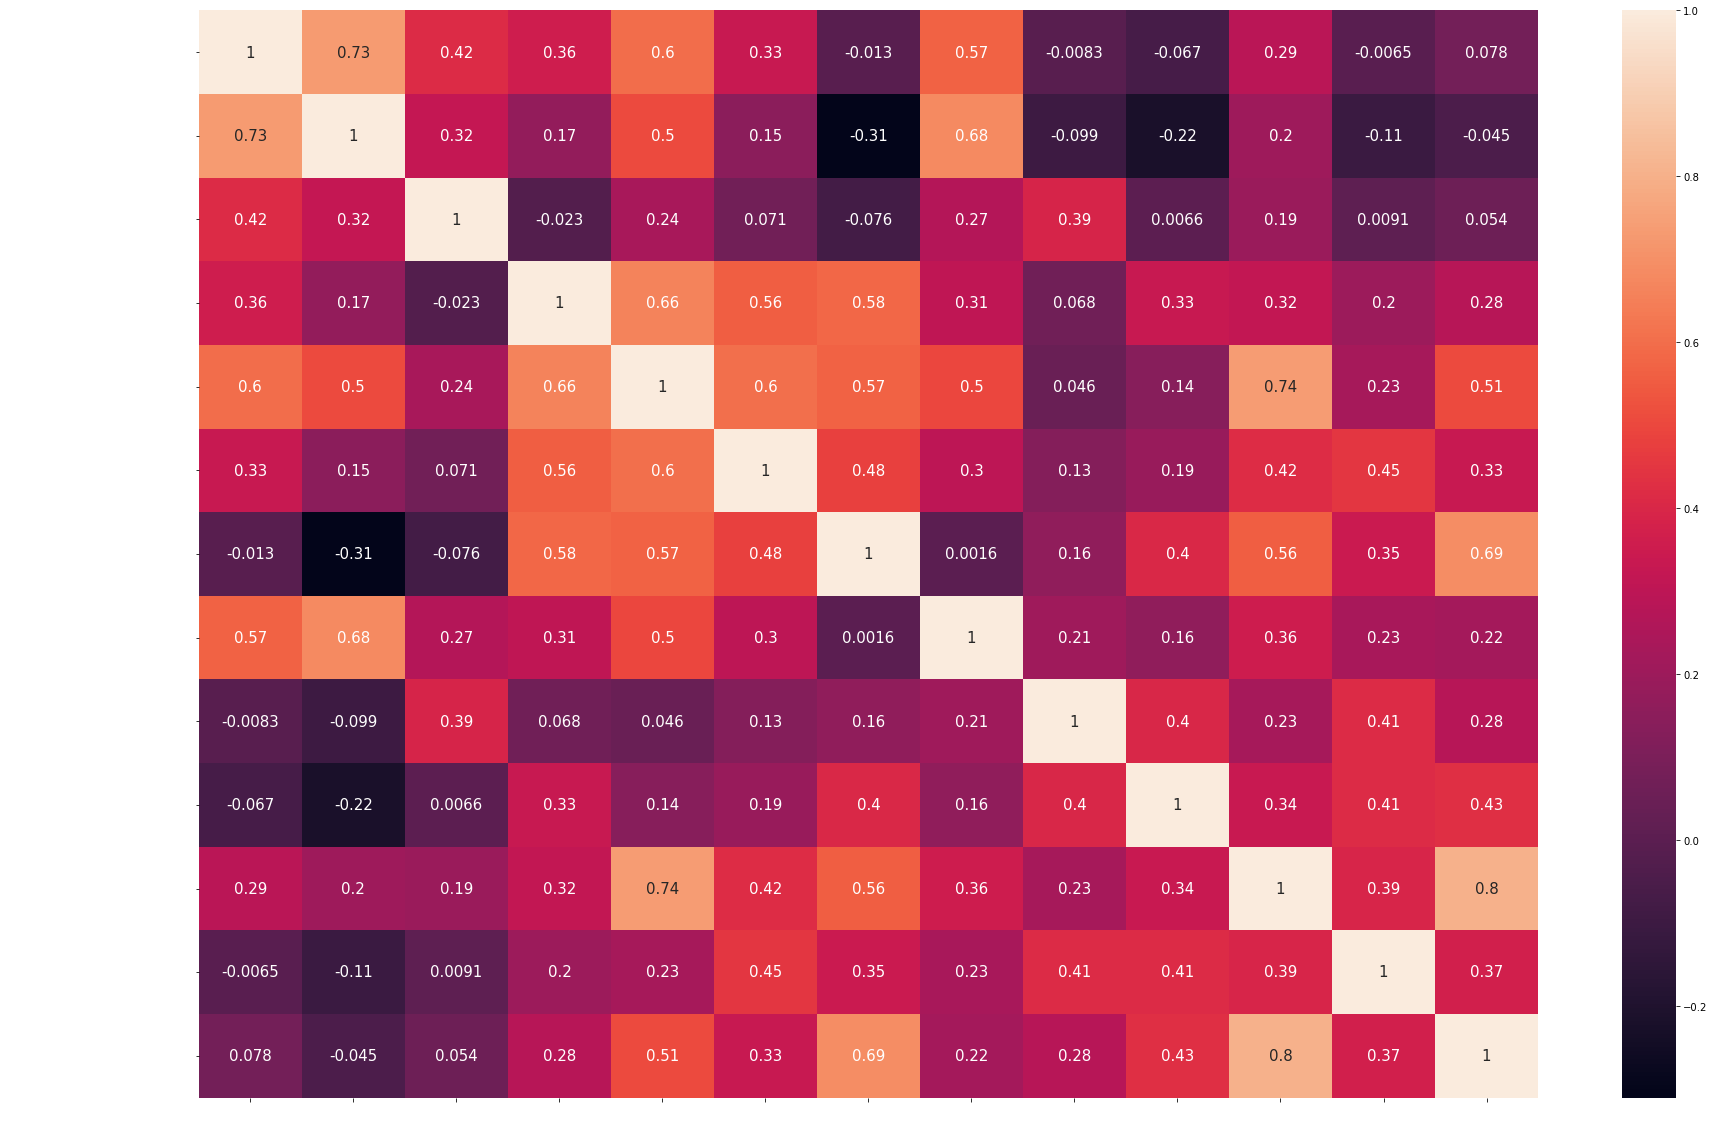

In [21]:
plt.figure(figsize =(30,20))
sns.heatmap(dataf.corr(), annot = True, annot_kws={"fontsize": 15})
plt.xticks(color='white', fontsize=15)
plt.yticks(color='white', fontsize=15)
plt.show()


#### d. Split dataset into train and test (70:30). Are both train and test representative of the overall data? How would you ascertain this statistically? (3 marks)

In [22]:
inp = dataf.drop(['diagnosis'], axis=1)
out = dataf['diagnosis']

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(inp, out, test_size = 0.3, random_state = 42, stratify = out)

In [24]:
features = ['radius_mean', 'texture_mean', 'smoothness_mean',
            'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
            'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
            'symmetry_se', 'fractal_dimension_se']

for feature in features:
    train_mean = np.mean(xtrain[feature])
    test_mean = np.mean(xtest[feature])
       
    print("Feature:", feature)
    print("Train Mean:", train_mean)
    print("Test Mean:", test_mean)
    print("Difference %:", ((train_mean-test_mean)/test_mean)*100)
    print()             

Feature: radius_mean
Train Mean: 14.117957286432167
Test Mean: 14.129128654970762
Difference %: -0.079066224191144

Feature: texture_mean
Train Mean: 19.438241206030156
Test Mean: 18.943801169590643
Difference %: 2.610036032436873

Feature: smoothness_mean
Train Mean: 0.09585738693467344
Test Mean: 0.0975307602339181
Difference %: -1.7157390091405402

Feature: compactness_mean
Train Mean: 0.10264758793969861
Test Mean: 0.1082823391812865
Difference %: -5.203758326788807

Feature: symmetry_mean
Train Mean: 0.1813635678391959
Test Mean: 0.18069239766081874
Difference %: 0.3714435067916026

Feature: fractal_dimension_mean
Train Mean: 0.06261967336683419
Test Mean: 0.0632117543859649
Difference %: -0.9366628483612643

Feature: radius_se
Train Mean: 0.4037105527638189
Test Mean: 0.3974894736842104
Difference %: 1.5650927864698387

Feature: texture_se
Train Mean: 1.2173768844221107
Test Mean: 1.2156350877192985
Difference %: 0.14328285851636727

Feature: smoothness_se
Train Mean: 0.006924238

### 3. Model Building (20 marks)

#### a. Build a decision tree model using the gini criterion. And obtain the number of correctly the predicted the target variablein the test set (4 marks)


In [25]:
#Build the model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

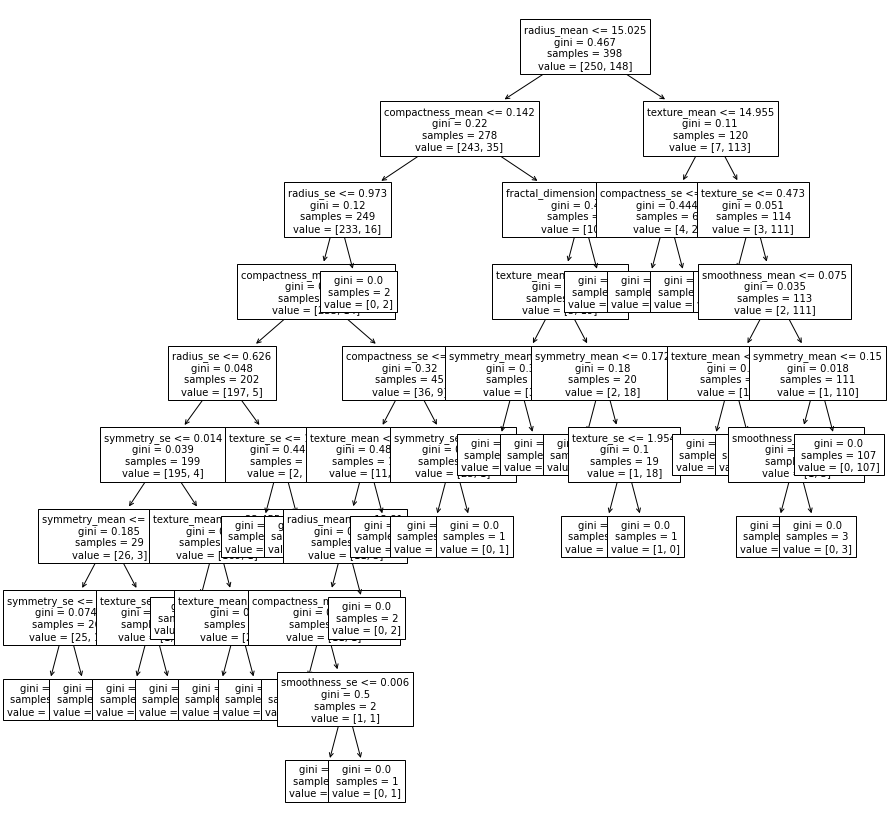

In [26]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(dt,fontsize=10,feature_names=xtrain.columns)
plt.show()

In [27]:
from sklearn.metrics import accuracy_score, classification_report

ypred = dt.predict(xtest)
ypredtr = dt.predict(xtrain)
print("Test Data: ", accuracy_score(ytest,ypred)*100,"% accuracy")
print("Training Data: ", accuracy_score(ytrain,ypredtr)*100,"% accuracy")

Test Data:  85.96491228070175 % accuracy
Training Data:  100.0 % accuracy


#### b. What is the overall Accuracy? Please comment on it (3 mark)

The overall accuracy of the model is around 87% but the accuracy on the training data shows a 100%. This is due to overfitting of the training data

In [28]:
#doing cross validation
from sklearn.model_selection import cross_val_score,KFold

kf = KFold(n_splits = 5, shuffle= True, random_state= 42)

score = cross_val_score(dt,inp,out,cv = kf, scoring ="f1")
print(score)
print(score.mean())

[0.83870968 0.84507042 0.89411765 0.80952381 0.85714286]
0.8489128827360112


To avoid overfitting, we're gonna be prunning the model.


In [29]:
# We need to find the optimal "max_depth" and "min_samples_split" values to prune the model

import numpy as np
from sklearn.metrics import accuracy_score

max_depth_values = range(3, 7)
min_samples_split_values = range(5, 16)

accuracy_diff = []

for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
        dt.fit(xtrain, ytrain)
        y_pred_test = dt.predict(xtest)
        y_pred_train = dt.predict(xtrain)
        accuracy_test = accuracy_score(ytest, y_pred_test) * 100
        accuracy_train = accuracy_score(ytrain, y_pred_train) * 100
        diff = abs(accuracy_test - accuracy_train)
        accuracy_diff.append((max_depth, min_samples_split, diff))

accuracy_diff.sort(key=lambda x: x[2])
best_max_depth, best_min_samples_split, best_diff = accuracy_diff[0]

print("Best combination:")
print("max_depth =", best_max_depth)
print("min_samples_split =", best_min_samples_split)
print("Difference in accuracy:", best_diff)


Best combination:
max_depth = 3
min_samples_split = 6
Difference in accuracy: 5.834729201563377


In [30]:
dataf.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

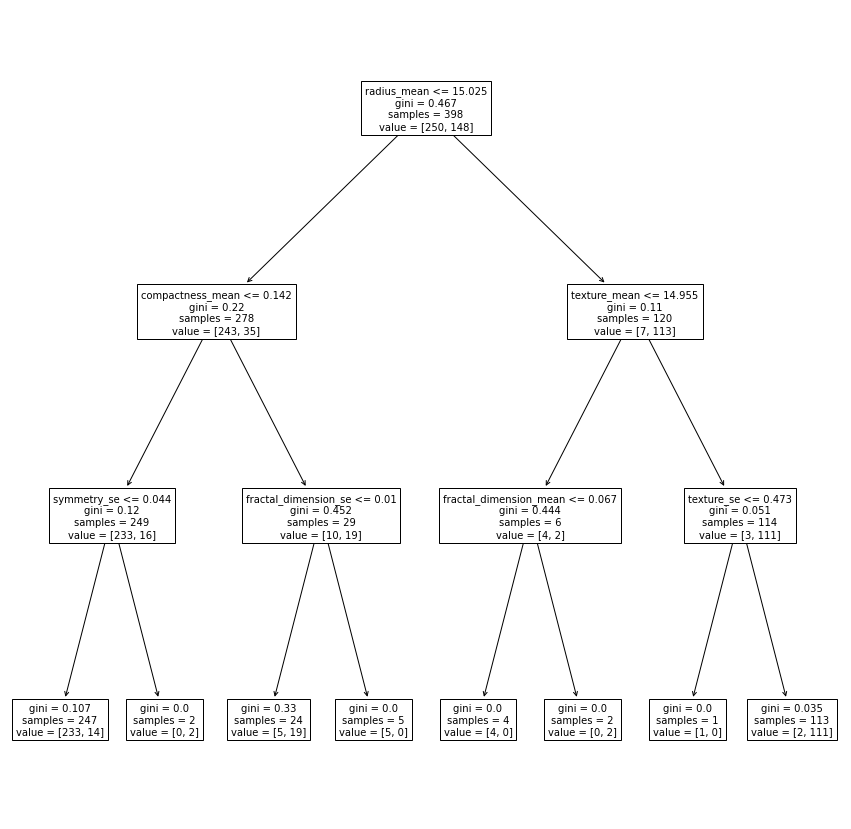

In [31]:
dt_p = DecisionTreeClassifier(max_depth= 3 , min_samples_split= 5)
dt_p.fit(xtrain,ytrain)
plt.figure(figsize=(15,15))
tree.plot_tree(dt_p,fontsize=10,feature_names=xtrain.columns)
plt.show()

In [32]:
ypred_p = dt_p.predict(xtest)
ypredtr_p = dt_p.predict(xtrain)
print("Test Data: ", accuracy_score(ytest,ypred_p)*100,"% accuracy")
print("Training Data: ", accuracy_score(ytrain,ypredtr_p)*100,"% accuracy")

Test Data:  87.71929824561403 % accuracy
Training Data:  94.72361809045226 % accuracy


#### c. Evaluate the model built using Precision, Recall and F1 Score and interpret the results with inferences (4 marks)


In [33]:
CR = classification_report(ytest,ypred_p)
print(CR)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       107
           1       0.88      0.78      0.83        64

    accuracy                           0.88       171
   macro avg       0.88      0.86      0.87       171
weighted avg       0.88      0.88      0.88       171



Based on the classification report:

For class 0 (benign cases), the Decision Tree model achieved a precision of 0.88, indicating that out of all the predicted benign cases, 88% were correctly classified. The recall, or sensitivity, is 0.93, meaning that the model identified 93% of the actual benign cases. The F1-score, which is the harmonic mean of precision and recall, is 0.91. Overall, the model performed well in predicting class 0, with relatively high precision, recall, and F1-score.

For class 1 (malignant cases), the Decision Tree model achieved a precision of 0.88, indicating that 89% of the predicted malignant cases were correctly classified. The recall, or sensitivity, is 0.80, meaning that the model identified 80% of the actual malignant cases. The F1-score is 0.84. The model showed a lower recall compared to class 0, suggesting that it may have difficulty capturing all instances of class 1.

The accuracy of the Decision Tree model is 0.88, which means that it correctly classified 88% of the total cases.

The macro-average F1-score is 0.87, which represents the average F1-score across both classes.

#### d. Build a LOGISTIC REGRESSION model and compare the performance of the same with decision tree. What are your inferences?

In [34]:
# Scaling the model
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() 

inp_sc = sc.fit_transform(inp)
inp_sc = pd.DataFrame(inp_sc, columns = inp.columns)
inp_sc


,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
0,1.100436,-2.073335,1.568466,3.283515,2.217515,2.255747,2.491428,-0.565265,-0.214002,1.316862,1.148757,0.907083
1,1.834310,-0.353632,-0.826962,-0.487072,0.001392,-0.868652,0.509166,-0.876244,-0.605351,-0.692926,-0.805450,-0.099444
2,1.583996,0.456187,0.942210,1.052926,0.939685,-0.398008,1.235576,-0.780083,-0.297005,0.814974,0.237036,0.293559
3,-0.768381,0.253732,3.283553,3.402909,2.867383,4.910919,0.336999,-0.110409,0.689702,2.744280,4.732680,2.047511
4,1.754665,-1.151816,0.280372,0.539340,-0.009560,-0.562450,1.277270,-0.790244,1.483067,-0.048520,-0.361092,0.499328
...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.115912,0.721473,1.041842,0.219060,-0.312589,-0.931027,2.782567,0.071025,1.086384,0.191805,-1.138416,0.167980
565,1.709153,2.085134,0.102458,-0.017833,-0.217664,-1.058611,1.307103,2.260938,-0.424010,-0.069758,-0.189161,-0.490556
566,0.705055,2.045574,-0.840484,-0.038680,-0.809117,-0.895587,0.196102,-0.257371,-0.379342,0.661277,-0.891416,0.036727
567,1.842843,2.336457,1.525767,3.272144,2.137194,1.043695,1.165128,0.686088,-0.173000,2.017716,0.326634,0.904057


In [35]:
#Splitting the scaled data in into test and train(70:30) 
xtrain_lr, xtest_lr, ytrain_lr, ytest_lr = train_test_split(inp_sc, out, test_size = 0.3, random_state = 42, stratify = out)

In [36]:
# Fitting the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(xtrain_lr, ytrain_lr)

LogisticRegression()

In [37]:
ypred_lr = lr.predict(xtest_lr)
ypredtr_lr = lr.predict(xtrain_lr)
print("Test Data: ", accuracy_score(ytest_lr,ypred_lr)*100,"% accuracy")
print("Training Data: ", accuracy_score(ytrain_lr,ypredtr_lr)*100,"% accuracy")

Test Data:  91.81286549707602 % accuracy
Training Data:  95.22613065326632 % accuracy


In [38]:
#doing cross validation
from sklearn.model_selection import cross_val_score,KFold

kf = KFold(n_splits = 5, shuffle= True, random_state = 42)

score = cross_val_score(lr,inp_sc,out,cv = kf, scoring ="f1")
print(score)
print(score.mean())

[0.94252874 0.93506494 0.9047619  0.91358025 0.85057471]
0.9093021070032563


In [39]:
#Classification Report for the Logistic Regression
ypred_lr = lr.predict(xtest_lr)
CR_lr = classification_report(ytest_lr,ypred_lr)
print(CR_lr)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       107
           1       0.90      0.88      0.89        64

    accuracy                           0.92       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



### Conclusion

In comparison to Logistic Regression, the Decision Tree model shows slightly lower performance in terms of precision, recall, and F1-score for both classes. 
It has a lower recall for class 1 (malignant cases) compared to Logistic Regression. This suggests that the Decision Tree model may struggle to accurately classify malignant cases compared to Logistic Regression. 
However, further analysis and comparison of other metrics, such as accuracy and overall model complexity, would be beneficial to make a comprehensive assessment of the model's performance.